In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                
uof = pd.read_csv('final_everything.csv')
uof.loc[uof.SubjectEthnicity == 'Chinese','SubjectEthnicity'] = 'Asian (or Asian British)'
uof = uof[uof['SubjectAge'] != '2017-11-01 00:00:00']
uof.head()

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\2845154527.py:5: DtypeWarning: Columns (38,39,40,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,101,141,181,221,274) have mixed types. Specify dtype option on import or set low_memory=False.
  uof = pd.read_csv('final_everything.csv')


,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectMedProvided,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Date,Average Score
0,2023-04-01,00:15:00,No,No,No,No,No,No,No,No,...,NaN,No,No,No,Yes,No,No,No,2023-06-30,0.6275
1,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,No,No,No,No,No,Yes,2023-06-30,0.5538
2,2023-04-01,01:00:00,No,No,No,No,No,No,Yes,No,...,NaN,No,No,Yes,No,No,No,No,2023-06-30,0.4962
3,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4750
4,2023-04-01,12:20:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4750


In [2]:
check = ['SubjectEthnicity', 'SubjectAge', 'SubjectInjured', 'SingleCrewed', 'Firearms Fired', 'Firearms Aimed', 'SubjectGender', 'PrimaryConduct', 'PhysicalDisability', 'MentalDisability']
impactfactor = [col for col in uof.columns if col.startswith('Impact Factor:')]
location = [col for col in uof.columns if col.startswith('Incident Location:')]
base = ['Borough', 'Average Score', 'Date']
training = []

temp = uof[check+impactfactor+base+location]
grouped = temp.groupby(['Borough', 'Date'])
total_counts = grouped.size()

white_counts = temp[temp['SubjectEthnicity'] != "White"].groupby(['Borough', 'Date']).size()
percent_white = (white_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageNotWhite'] = temp.set_index(['Borough', 'Date']).index.map(percent_white)
training.append('PercentageNotWhite')

underaged_counts = temp[(temp['SubjectAge'] == "0-10") | (temp['SubjectAge'] == "11-17")].groupby(['Borough', 'Date']).size()
percent_underaged = (underaged_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageUnder18'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
training.append('PercentageUnder18')

over50_counts = temp[(temp['SubjectAge'] == "50-64") | (temp['SubjectAge'] == "65 and over")].groupby(['Borough', 'Date']).size()
percent_over50 = (over50_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageOver50'] = temp.set_index(['Borough', 'Date']).index.map(percent_over50)
training.append('PercentageOver50')

firearmsaimed_counts = temp[(temp['SubjectGender'] != "Male")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageNotMale'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageNotMale')

firearmsaimed_counts = temp[(temp['SubjectInjured'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageSubjectInjured'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageSubjectInjured')

firearmsaimed_counts = temp[(temp['SingleCrewed'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageSingleCrewed'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageSingleCrewed')

firearmsaimed_counts = temp[(temp['PhysicalDisability'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentagePhysicalDisability'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentagePhysicalDisability')

firearmsaimed_counts = temp[(temp['MentalDisability'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageMentalDisability'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageMentalDisability')

firearmsaimed_counts = temp[(temp['Impact Factor: Possesion of a weapon'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageWeaponPossesion'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageWeaponPossesion')

firearmsaimed_counts = temp[(temp['Impact Factor: Alcohol'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageAlcohol'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageAlcohol')

firearmsaimed_counts = temp[(temp['Impact Factor: Drugs'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageDrugs'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageDrugs')

firearmsaimed_counts = temp[(temp['Impact Factor: Size/Gender/Build'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageSizeGenderBuild'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageSizeGenderBuild')

firearmsaimed_counts = temp[(temp['Impact Factor: Acute Behavioural Disorder'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageAcuteBehaviouralDisorder'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageAcuteBehaviouralDisorder')

firearmsaimed_counts = temp[(temp['Impact Factor: Crowd'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageCrowd'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageCrowd')

firearmsaimed_counts = temp[(temp['PrimaryConduct'] != "Compliant")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageNotCompliant'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageNotCompliant')

firearmsaimed_counts = temp[(temp['Incident Location: Street/Highway'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageStreetHighway'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Public Transport'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentagePublicTransport'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Retail Premises'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageRetailPremises'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Open ground (e.g. park, car park, field)'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageOpenGround'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Licensed Premises'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageLicensedPremises'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Sports or Event Stadia'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageSportsEventStadia'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Hospital/A&E (non-mental-health setting)'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageHospital'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Mental Health Setting'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentagePsychiatric'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

firearmsaimed_counts = temp[(temp['Incident Location: Dwelling'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageDwelling'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)

temp['PercentageInPublic'] = temp['PercentageStreetHighway']+temp['PercentagePublicTransport']+temp['PercentageRetailPremises']+temp['PercentageOpenGround']+temp['PercentageLicensedPremises']+temp['PercentageSportsEventStadia']+temp['PercentageHospital']+temp['PercentagePsychiatric']+temp['PercentageDwelling']
training.append('PercentageInPublic')

firearmsaimed_counts = temp[(temp['Firearms Aimed'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageFirearmsAimed'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageFirearmsAimed')

firearmsaimed_counts = temp[(temp['Firearms Fired'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageFirearmsFired'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)
training.append('PercentageFirearmsFired')

temp['UoF Cases'] = temp.groupby(['Date', 'Borough'])['Borough'].transform('count')
temp['UoF Cases in thousands'] = temp['UoF Cases'] / 1000
training.append('UoF Cases in thousands')

temp = temp.drop(columns=(check+impactfactor+location))
temp = temp.fillna(0)
temp.drop_duplicates(inplace=True)

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\542802388.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['PercentageNotWhite'] = temp.set_index(['Borough', 'Date']).index.map(percent_white)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\542802388.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['PercentageUnder18'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\542802388.py:23: SettingWithCopyWarning: 
A value 

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp[training] = scaler.fit_transform(temp[training])

  
X = temp[training]
y = temp['Average Score']

X = sm.add_constant(X)

VIF_df = pd.DataFrame()
VIF_df["Variable"] = X.columns
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIF_df)

model = sm.OLS(y, X).fit()
print(model.summary())

                              Variable       VIF
0                                const  1.000000
1                   PercentageNotWhite  2.753811
2                    PercentageUnder18  2.686372
3                     PercentageOver50  1.431583
4                    PercentageNotMale  2.152632
5             PercentageSubjectInjured  1.604553
6               PercentageSingleCrewed  1.335178
7         PercentagePhysicalDisability  1.209416
8           PercentageMentalDisability  2.245944
9            PercentageWeaponPossesion  2.375536
10                   PercentageAlcohol  2.876565
11                     PercentageDrugs  1.560245
12           PercentageSizeGenderBuild  1.431160
13  PercentageAcuteBehaviouralDisorder  1.312930
14                     PercentageCrowd  1.819683
15              PercentageNotCompliant  3.187960
16                  PercentageInPublic  1.133750
17             PercentageFirearmsAimed  1.788578
18             PercentageFirearmsFired  1.043097
19              UoF 

In [4]:
training.remove('PercentagePhysicalDisability')
training.remove('PercentageFirearmsFired')
training.remove('PercentageFirearmsAimed')
training.remove('PercentageDrugs')

X = temp[training]
y = temp['Average Score']

X = sm.add_constant(X)

VIF_df = pd.DataFrame()
VIF_df["Variable"] = X.columns
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIF_df)

model = sm.OLS(y, X).fit()
print(model.summary())

                              Variable       VIF
0                                const  1.000000
1                   PercentageNotWhite  2.734636
2                    PercentageUnder18  2.142114
3                     PercentageOver50  1.372830
4                    PercentageNotMale  2.137700
5             PercentageSubjectInjured  1.579844
6               PercentageSingleCrewed  1.279457
7           PercentageMentalDisability  2.206912
8            PercentageWeaponPossesion  1.893155
9                    PercentageAlcohol  2.828094
10           PercentageSizeGenderBuild  1.350863
11  PercentageAcuteBehaviouralDisorder  1.307617
12                     PercentageCrowd  1.807548
13              PercentageNotCompliant  2.995061
14                  PercentageInPublic  1.131346
15              UoF Cases in thousands  2.167103
                            OLS Regression Results                            
Dep. Variable:          Average Score   R-squared:                       0.518
Model:   

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_list = []
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

average_rmse = np.mean(rmse_list)
print("Average RMSE:", average_rmse)

Average RMSE: 0.04862133528008929


In [6]:
check = ['SubjectAge']
base = ['Borough', 'Average Score', 'Date']
training = []

temp = uof[check+base]
grouped = temp.groupby(['Borough', 'Date'])
total_counts = grouped.size()

underaged_counts = temp[(temp['SubjectAge'] == "0-10")|(temp['SubjectAge'] == "11-17")].groupby(['Borough', 'Date']).size()
percent_underaged = (underaged_counts).reindex(grouped.indices, fill_value=0)
temp['Under18'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
training.append('Under18')

underaged_counts = temp[(temp['SubjectAge'] == "18-34")].groupby(['Borough', 'Date']).size()
percent_underaged = (underaged_counts).reindex(grouped.indices, fill_value=0)
temp['Age18to34'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
training.append('Age18to34')

underaged_counts = temp[(temp['SubjectAge'] == "35-49")].groupby(['Borough', 'Date']).size()
percent_underaged = (underaged_counts).reindex(grouped.indices, fill_value=0)
temp['Age35to49'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
training.append('Age35to49')

over50_counts = temp[(temp['SubjectAge'] == "50-64")|(temp['SubjectAge'] == "65 and over")].groupby(['Borough', 'Date']).size()
percent_over50 = (over50_counts).reindex(grouped.indices, fill_value=0)
temp['Over50'] = temp.set_index(['Borough', 'Date']).index.map(percent_over50)
training.append('Over50')

temp = temp.drop(columns=(check))
temp = temp.fillna(0)
temp.drop_duplicates(inplace=True)

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\3601879418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Under18'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\3601879418.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Age18to34'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_7452\3601879418.py:21: SettingWithCopyWarning: 
A value is trying to

In [7]:
X = temp[training]
y = temp['Average Score']

X = sm.add_constant(X)

VIF_df = pd.DataFrame()
VIF_df["Variable"] = X.columns
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIF_df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained variance by component:", pca.explained_variance_ratio_)

lasso = Lasso(alpha=0.05)  # Alpha value needs tuning
lasso.fit(X, y)

# Output coefficients
print("Coefficients:", lasso.coef_)

model = sm.OLS(y, X).fit()
print(model.summary())

    Variable        VIF
0      const   4.549062
1    Under18   2.951028
2  Age18to34  10.124806
3  Age35to49  12.747258
4     Over50   6.013013
Explained variance by component: [0.96981389 0.01590234]
Coefficients: [ 0.         -0.00057856  0.00020399 -0.00030425 -0.00024383]
                            OLS Regression Results                            
Dep. Variable:          Average Score   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     106.4
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.17e-73
Time:                        15:22:45   Log-Likelihood:                 1258.1
No. Observations:                 864   AIC:                            -2506.
Df Residuals:                     859   BIC:                            -2482.
Df Model:                           4                                         
Covariance T

In [8]:
temp = temp.drop(columns='Date')
temp_mean = temp.groupby('Borough').transform('mean')
temp.update(temp_mean)
temp = temp.drop_duplicates()
temp = temp.reset_index(drop=True)
temp.head(40)

,Borough,Average Score,Under18,Age18to34,Age35to49,Over50
0,Harrow,0.602230,57.111111,294.629630,135.333333,35.666667
1,City of Westminster,0.618052,198.444444,1494.851852,590.925926,196.925926
2,Redbridge,0.577874,82.000000,431.962963,191.444444,41.666667
3,Tower Hamlets,0.556026,140.074074,820.592593,337.296296,74.777778
4,Enfield,0.526248,111.814815,520.259259,205.222222,67.370370
5,Hammersmith and Fulham,0.597263,97.777778,488.111111,238.592593,84.222222
6,Newham,0.581289,176.703704,855.148148,387.148148,108.888889
7,Hillingdon,0.611611,80.444444,467.703704,228.370370,62.222222
8,Waltham Forest,0.527681,109.666667,463.370370,211.962963,57.703704
9,Brent,0.587352,124.740741,792.111111,332.333333,102.111111


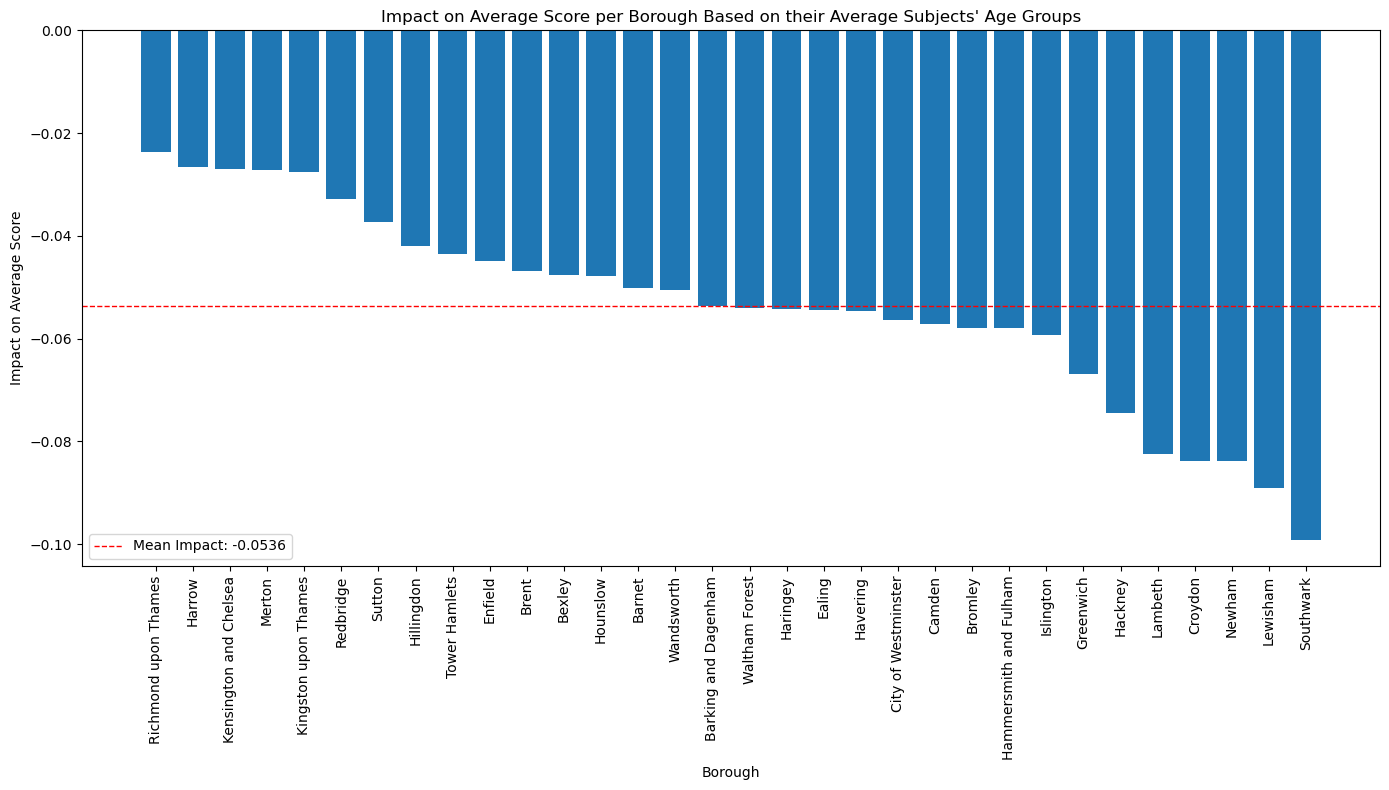

In [18]:
coefficients = {
    'Under18': -0.0006,
    'Age18to34': 0.0002,
    'Age35to49': -0.0003,
    'Over50': -0.0003
}

temp['Impact'] = (
    coefficients['Under18'] * temp['Under18'] +
    coefficients['Age18to34'] * temp['Age18to34'] +
    coefficients['Age35to49'] * temp['Age35to49'] +
    coefficients['Over50'] * temp['Over50']
)

temp_sorted = temp.sort_values(by='Impact', ascending=False)

# Calculate the mean of the 'Impact' column
mean_impact = temp['Impact'].mean()

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(temp_sorted['Borough'], temp_sorted['Impact'])
plt.axhline(mean_impact, color='r', linestyle='--', linewidth=1, label=f'Mean Impact: {mean_impact:.4f}')
plt.xticks(rotation=90)
plt.xlabel('Borough')
plt.ylabel('Impact on Average Score')
plt.title("Impact on Average Score per Borough Based on their Average Subjects' Age Groups")
plt.legend()
plt.tight_layout()
plt.savefig("Impact on Average Score Age.png")
plt.show()
